### loading the packages

In [1]:
import os
import pandas as pd
from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer('distilbert-base-nli-mean-tokens')
from nltk.stem import WordNetLemmatizer
import re
#import preprocessor as p
ps = WordNetLemmatizer()

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#from wordcloud import WordCloud

c:\Users\91960\anaconda3\envs\huggingface\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Read the data

In [2]:
titles = []
ids = []
import json
import pandas as pd
with open('dataset/arxiv-metadata-oai-snapshot.json', 'r') as f:
    for i, line in enumerate(f):   
        titles.append(json.loads(line)['title'])
        ids.append(str(json.loads(line)['id']))
        if i==1000:
            break
df = pd.DataFrame()
df['title'] = titles


In [3]:

def clean_abstract(df):
    corpus = []
    for line in df:
        review = re.sub('[^a-zA-Z]', ' ', line)
        review = review.lower()
        review = review.split()
        
        review = [ps.lemmatize(word) for word in review]
        review = ' '.join(review)
        corpus.append(review)    
    return corpus

In [4]:
df['title'] = clean_abstract(df['title'])

In [5]:
df.shape

(1001, 1)

In [6]:
corpus = list(df['title'])

In [7]:
len(corpus)

1001

### Clustering

In [8]:
corpus_embeddings = embedder.encode(corpus)

In [9]:
corpus_embeddings.shape

(1001, 768)

In [17]:
num_clusters = 50
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_


c:\Users\91960\anaconda3\envs\huggingface\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91960\anaconda3\envs\huggingface\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [18]:
import joblib
filename = "knn.joblib"
# save model
joblib.dump(clustering_model, filename)
loaded_model = joblib.load('knn.joblib')

In [108]:
cluster_df = pd.DataFrame(corpus, columns = ['corpus'])
cluster_df['cluster'] = cluster_assignment
cluster_df['id']=ids
cluster_df['id'] = df.apply(
#    lambda row: '<a href="{}">{}</a>'.format(row['links'], row['links']),
#    axis=1)  

,corpus,cluster,id
0,calculation of prompt diphoton production cros...,36,0704.0001
1,sparsity certifying graph decomposition,27,0704.0002
2,the evolution of the earth moon system based o...,38,0704.0003
3,a determinant of stirling cycle number count u...,16,0704.0004
4,from dyadic lambda alpha to lambda alpha,14,0704.0005
...,...,...,...
996,stable algebra of entire function,7,0704.0997
997,test vector for trilinear form when two repres...,4,0704.0998
998,generic character sheaf on disconnected group ...,16,0704.0999
999,measurement of d d bar mixing in d k pi pi decay,44,0704.1000


In [19]:
cluster_df.to_csv("sample_data", sep=',', index=False, encoding='utf-8')

In [20]:
ddf = pd.read_csv("sample_data")

In [21]:
ddf

,corpus,cluster,id
0,calculation of prompt diphoton production cros...,62,704.0001
1,sparsity certifying graph decomposition,42,704.0002
2,the evolution of the earth moon system based o...,1,704.0003
3,a determinant of stirling cycle number count u...,90,704.0004
4,from dyadic lambda alpha to lambda alpha,29,704.0005
...,...,...,...
996,stable algebra of entire function,9,704.0997
997,test vector for trilinear form when two repres...,44,704.0998
998,generic character sheaf on disconnected group ...,90,704.0999
999,measurement of d d bar mixing in d k pi pi decay,55,704.1000


In [13]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

### Result

In [98]:
clustered_titles = [[] for i in range(num_clusters)]
clustered_ids = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_titles[cluster_id].append(corpus[sentence_id])
    clustered_ids[cluster_id].append(ids[sentence_id]) 

In [99]:
clustered_titles

[['p adic limit of weakly holomorphic modular form of half integral weight',
  'generalized regularly discontinuous solution of the einstein equation',
  'pseudo random puncturing a technique to lower the error floor of turbo code',
  'an equilibrium problem for the limiting eigenvalue distribution of banded toeplitz matrix',
  'locating the peak of least energy solution to a quasilinear elliptic neumann problem',
  'dissipative backward stochastic differential equation with locally lipschitz nonlinearity',
  'effect of imperfect gate operation in shor s prime factorization algorithm',
  'weak and strong taylor method for numerical solution of stochastic differential equation',
  'a priori estimate for weak solution of complex monge amp ere equation',
  'gorenstein locus of minuscule schubert variety',
  'glueball mass in dimensional anisotropic weakly coupled yang mill theory',
  'late time tail of a yang mill field on minkowski and schwarzschild background'],
 ['spectroscopic propert

In [65]:
len(clustered_sentences)

50

In [100]:
ct = pd.DataFrame(clustered_titles)

In [102]:
ci = pd.DataFrame(clustered_ids)

In [106]:
ct.T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,p adic limit of weakly holomorphic modular for...,spectroscopic property of polarons in strongly...,neutron skin and giant resonance in nucleus,approximation for extinction probability of th...,the complexity of hcp in digraps with degree b...,convergence of the discrete dipole approximati...,alma a the ideal probe of the solar chromosphere,the hardy lorentz space h p q r n,tuning correlation effect with electron phonon...,iterated integral and the loop product,...,origin of adaptive mutant a quantum measurement,topology change of black hole,a universality in pp wave,the discrete dipole approximation for simulati...,measurement of the hadronic form factor in d k...,gamma ray emitting agn and glast,multilinear function series in conditionally f...,chandra observation of supernova a,very strong and slowly varying magnetic field ...,spectroscopic observation of the intermediate ...
1,generalized regularly discontinuous solution o...,the decomposition method and maple procedure f...,quark matter and the astrophysics of neutron star,cp violation in beauty decay,contrasting two transformation based method fo...,the discrete dipole approximation an overview ...,a computer program for fast non lte analysis o...,geometry of locally compact group of polynomia...,coulomb excitation of unstable nucleus at inte...,phase diagram of gaussian core nematics,...,order of epitaxial self assembled quantum dot ...,reducing sat to sat,much ado about,shaping the globular cluster mass function by ...,experimental effort in search of ge neutrinole...,capacity of a multiple antenna fading channel ...,on line viterbi algorithm and it relationship ...,magnetohydrodynamic rebound shock of supernova,domain wall dynamic near a quantum critical point,molecular synchronization wave in array of all...
2,pseudo random puncturing a technique to lower ...,a rigorous time domain analysis of full wave e...,isotopic effect in nuclear reaction at relativ...,timing and lensing of the colliding bullet clu...,the veldkamp space of two qubits,new simple modular lie superalgebras a general...,discovery of a point like very high energy gam...,rigid subset of symplectic manifold,coincidence of the oscillation in the dipole t...,intersection body and generalized cosine trans...,...,quantum deformation of relativistic symmetry,invariance and the twisted chern character a c...,duality and tameness,dark matter annihilation in draco new consider...,reparametrization invariance the controversial...,hydrodynamic and spectral simulation of hmxb wind,analysis of random boolean network using the a...,exploring first star era with glast,spin orbit coupling effect on the persistent c...,an online repository of swift xrt light curve ...
3,an equilibrium problem for the limiting eigenv...,doe the present data on b s bar b s mixing rul...,neutron inelastic scattering process a backgro...,lower ground state due to counter rotating wav...,on the homology of two dimensional elimination,hadron in medium theory confronts experiment,the reliability on the direction of the incide...,smooth map with singularity of bounded k codim...,counterflow of electron in two isolated quantu...,a note about the ki z function,...,quantum phase transition in the four spin exch...,the blazar spectral sequence and glast,towards self consistent definition of instanto...,enhanced quantum zeno effect and bunching in t...,remark on n c dependence of decay of exotic ba...,multi spectral observation of lunar occultatio...,probability distribution generated by fraction...,supernova polarization and the type iin classi...,evolution of a band insulating phase from a co...,symmetry by base substitution in the genetic c...
4,locating the peak of least energy solution to ...,first based survey of compact steep spectrum s...,effect of dirac sea on pion propagation in asy...,radiative loss and cut offs of energetic parti...,second order eikonal correction for a e e p,gen

In [103]:
ct.to_csv("titles", sep=',', index=False, encoding='utf-8')

In [104]:
ci.to_csv("ids", sep=',', index=False, encoding='utf-8')

In [15]:
loaded_model.predict(embedder.encode(['machine learning is intuitive']))

array([33])

c:\Users\91960\anaconda3\envs\huggingface\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91960\anaconda3\envs\huggingface\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\91960\anaconda3\envs\huggingface\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91960\anaconda3\envs\huggingface\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMean

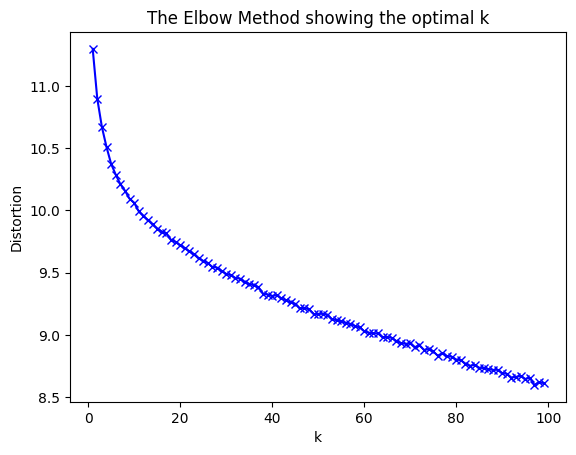

In [16]:
distortions = []
K = range(1,100)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(corpus_embeddings)
    kmeanModel.fit(corpus_embeddings)
    distortions.append(sum(np.min(cdist(corpus_embeddings, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / corpus_embeddings.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

 


In [75]:
cluster_req = cluster_df.loc[0]

In [76]:
cluster_df = pd.read_csv("sample_data")

In [54]:
import ast

In [55]:
ast.literal_eval(cluster_req[0])['id']

'0704.0013'

In [77]:
cluster_req.shape

(39,)

In [78]:
cluster_req['0']

"{'title': 'p adic limit of weakly holomorphic modular form of half integral weight', 'id': '0704.0013'}"